In [49]:
import datamol as dm
import pandas as pd
from rdkit import Chem
import plotly.express as px


def conformer_energies(conformers):
    all_props = [conf.GetPropsAsDict() for conf in conformers.GetConformers()]
    return pd.DataFrame(all_props)

def write_conformers(filename, conformers):
    """Writes all conformers to an sdf file with name filename."""
    c0 = conformers.GetConformer(0)
    m0 = c0.GetOwningMol()
    all_props = [conf.GetPropsAsDict() for conf in conformers.GetConformers()]
    energy_keys = [x for x in all_props[0].keys() if 'delta' not in x]
    energy_key = energy_keys[0]
    with Chem.SDWriter(filename+".sdf") as w:
        for i in range(m0.GetNumConformers()):
            m0.SetProp('ID', f'conf_{i}')
            m0.SetProp('E_kcal', f"{all_props[i][energy_key]:.3f}")
            w.write(m0, confId=i)
    
    print(f"Wrote {m0.GetNumConformers()} conformers to {filename}.sdf")
    

# def reduce_conformers(conformers, threshold=1):
#     all_props = [conf.GetPropsAsDict() for conf in conformers.GetConformers()]
#     confs = {}
#     i_conf = 0
#     energy_keys = [x for x in all_props[0].keys() if 'delta' not in x]
#     energy_key = energy_keys[0]
#     for i, props in enumerate(all_props):
#         if i==0:
#             confs[i_conf] = {0: all_props[0]}
#             prev_Energy = all_props[0][energy_key]
#         else:
#             if abs(props[energy_key] - prev_Energy) > threshold:
#                 i_conf += 1
#                 confs[i_conf] = {i: props}
#                 prev_Energy = props[energy_key]
#             else:
#                 confs[i_conf][i] = props
#                 prev_Energy = (N_items*prev_Energy + props[energy_key])/(N_items+1)
        
#         N_items = len(confs[i_conf])

#     return confs

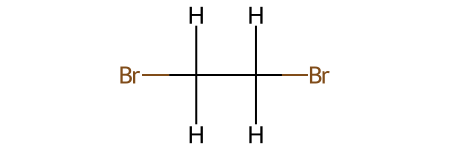

In [59]:
mol = dm.to_mol('BrCCBr', add_hs=True)
mol

In [60]:
mol_conformers = dm.conformers.generate(mol, forcefield="MMFF94s",
                                        minimize_energy=True,
                                        align_conformers=True,
                                        add_hs=False,
                                        energy_iterations=500
                                       ) 

In [63]:
write_conformers('BrCCBr', mol_conformers)

Wrote 50 conformers to BrCCBr.sdf


In [70]:
df = conformer_energies(mol_conformers)
df.head(20) # Just print the first few rows

,rdkit_MMFF94s_energy,rdkit_MMFF94s_delta_energy
0,3.495023,0.000000e+00
1,3.495023,5.124345e-12
2,3.495023,2.041300e-11
3,3.495023,5.966694e-11
4,3.495023,1.911364e-10
5,3.495023,1.967368e-10
6,3.495023,2.162261e-10
7,3.495023,7.212235e-10
8,3.495023,7.536616e-10
9,3.495023,1.106118e-09
